In [ ]:
#SORT OUT SAVING FIGURES
#SEE IF IT RUNS
#LOOK AT THE CORRELATION AND OBSERVERATIONS

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

In [32]:
cities

['port elizabeth',
 'hermanus',
 'taolanaro',
 'illoqqortoormiut',
 'coihaique',
 'lebu',
 'souillac',
 'ganzhou',
 'albany',
 'inirida',
 'busselton',
 'san angelo',
 'san jose',
 'punta arenas',
 'bonthe',
 'new norfolk',
 'luderitz',
 'laguna',
 'mataura',
 'cumaribo',
 'hong gai',
 'ugoofaaru',
 'vila velha',
 'mys shmidta',
 'port blair',
 'djambala',
 'yumen',
 'avarua',
 'barrow',
 'port alfred',
 'lively',
 'ushuaia',
 'upernavik',
 'khatanga',
 'finschhafen',
 'arraial do cabo',
 'bengkulu',
 'kholm',
 'kaitangata',
 'lokken verk',
 'tucupita',
 'oktyabrskiy',
 'wanganui',
 'umzimvubu',
 'cabo san lucas',
 'puerto ayora',
 'rikitea',
 'piranhas',
 'nome',
 'atuona',
 'dwarka',
 'ancud',
 'east london',
 'barentsburg',
 'ilulissat',
 'sitka',
 'bandarbeyla',
 'clyde river',
 'grand gaube',
 'srednekolymsk',
 'utiroa',
 'rudnogorsk',
 'katete',
 'mecca',
 'walvis bay',
 'male',
 'port-de-paix',
 'martaban',
 'porto novo',
 'provideniya',
 'armacao dos buzios',
 'mahebourg',
 'ca

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [34]:

# Create city data list
city_data = []

print("Beginning Data Retrieval")
print("-----------------------------")

record_count = 1
set_count = 1

# Loop through all the cities in list
for city in cities:

    try:
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        response = requests.get(query_url + city).json()
        
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]     
            
        # Add City info into city_data list
        city_data.append({"City": city.title(), 
                          "Latitude": lat, 
                          "Longitude": lng, 
                          "Max Temperature": max_temp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Date": date,
                          "Country": country})
    

    except:
        print("City not found. Skipping...")
        
    record_count += 1
    if record_count == 50:
        record_count = 1
        set_count += 1
        
print("-----------------------------")
print("Data Retrieval Complete")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | coihaique
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | ganzhou
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | inirida
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | san angelo
Processing Record 13 of Set 1 | san jose
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | bonthe
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | laguna
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | cumaribo
City not found. Skipping...
Processing Record 21 of Set 1 | hong 

City not found. Skipping...
Processing Record 38 of Set 4 | hithadhoo
Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | hofn
Processing Record 41 of Set 4 | atambua
Processing Record 42 of Set 4 | ribeira grande
Processing Record 43 of Set 4 | pochutla
Processing Record 44 of Set 4 | prince rupert
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | rumoi
Processing Record 48 of Set 4 | cap malheureux
Processing Record 49 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 1 of Set 5 | kununurra
Processing Record 2 of Set 5 | callaway
Processing Record 3 of Set 5 | kerema
Processing Record 4 of Set 5 | muros
Processing Record 5 of Set 5 | amderma
City not found. Skipping...
Processing Record 6 of Set 5 | georgetown
Processing Record 7 of Set 5 | airai
Processing Record 8 of Set 5 | bathsheba
Processing Record 9 of Set 5 | parksville
Processing Record 10 of Set 

Processing Record 32 of Set 8 | dongsheng
Processing Record 33 of Set 8 | sao jose da coroa grande
Processing Record 34 of Set 8 | birobidzhan
Processing Record 35 of Set 8 | ternate
Processing Record 36 of Set 8 | tramore
Processing Record 37 of Set 8 | haines junction
Processing Record 38 of Set 8 | jardim
Processing Record 39 of Set 8 | iberia
Processing Record 40 of Set 8 | jumla
Processing Record 41 of Set 8 | bethel
Processing Record 42 of Set 8 | kapoeta
Processing Record 43 of Set 8 | pandan
Processing Record 44 of Set 8 | mbekenyera
Processing Record 45 of Set 8 | lisakovsk
Processing Record 46 of Set 8 | dabola
Processing Record 47 of Set 8 | lazaro cardenas
Processing Record 48 of Set 8 | coari
Processing Record 49 of Set 8 | alta floresta
Processing Record 1 of Set 9 | bilibino
Processing Record 2 of Set 9 | smithers
Processing Record 3 of Set 9 | curup
Processing Record 4 of Set 9 | zeya
Processing Record 5 of Set 9 | mega
Processing Record 6 of Set 9 | tambul
City not fou

Processing Record 28 of Set 12 | peniche
Processing Record 29 of Set 12 | juneau
Processing Record 30 of Set 12 | amahai
Processing Record 31 of Set 12 | hohhot
Processing Record 32 of Set 12 | sarahan
Processing Record 33 of Set 12 | klaksvik
Processing Record 34 of Set 12 | kyren
Processing Record 35 of Set 12 | qasigiannguit
Processing Record 36 of Set 12 | hearst
Processing Record 37 of Set 12 | ust-tarka
Processing Record 38 of Set 12 | port-gentil
Processing Record 39 of Set 12 | buchanan
Processing Record 40 of Set 12 | mendahara
City not found. Skipping...
Processing Record 41 of Set 12 | killybegs
Processing Record 42 of Set 12 | sorland
Processing Record 43 of Set 12 | kismayo
Processing Record 44 of Set 12 | benidorm
Processing Record 45 of Set 12 | barbar
City not found. Skipping...
Processing Record 46 of Set 12 | aksarka
Processing Record 47 of Set 12 | kendari
Processing Record 48 of Set 12 | hirara
Processing Record 49 of Set 12 | mezen
Processing Record 1 of Set 13 | i

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [35]:
# city_dict = {"City": cities, 
#              "Latitude": lat, 
#              "Longtitude": lng, 
#              "Max Temperature": max_temp, 
#              "Humidity": humidity, 
#              "Cloudiness": cloudiness, 
#              "Wind Speed": wind_speed, 
#              "Country": country, 
#              "Date": date}

city_df = pd.DataFrame(city_data)
city_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date,Country
0,Port Elizabeth,-33.9180,25.5701,71.10,55,0,1.14,1627721205,ZA
1,Hermanus,-34.4187,19.2345,63.90,64,95,1.23,1627721007,ZA
2,Coihaique,-45.5752,-72.0662,31.95,80,0,3.44,1627720929,CL
3,Lebu,-37.6167,-73.6500,45.90,86,40,14.63,1627721205,CL
4,Souillac,-20.5167,57.5167,75.58,60,20,14.97,1627721027,MU
...,...,...,...,...,...,...,...,...,...
575,Otradnoye,59.7775,30.8181,67.55,86,97,14.25,1627721269,RU
576,Gogrial,8.5332,28.1004,76.96,84,100,2.82,1627721269,SS
577,Andenes,69.3143,16.1194,49.06,76,90,13.80,1627721269,NO
578,Takoradi,4.8845,-1.7554,79.38,76,39,7.11,1627721269,GH


In [36]:
city_df.to_csv(r".\output_data\Cities.csv", index_label="City ID")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
city_df.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,5.800000e+02
mean,19.312319,18.701140,70.897431,65.981034,52.706897,8.106155,1.627721e+09
std,33.259067,88.206248,15.349323,23.755548,40.147487,5.836630,6.509827e+01
min,-54.800000,-175.200000,31.530000,6.000000,0.000000,0.000000,1.627721e+09
25%,-8.106425,-57.576450,60.365000,51.000000,7.750000,3.525000,1.627721e+09
50%,22.194700,23.238150,72.520000,73.000000,60.500000,6.790000,1.627721e+09
75%,47.429200,92.050025,81.527500,86.000000,94.000000,11.612500,1.627721e+09
max,78.218600,179.316700,116.560000,100.000000,100.000000,30.200000,1.627721e+09


In [38]:
#  Get the indices of cities that have humidity over 100%.
humid_city = city_df[(city_df["Humidity"] > 100)].index
                                  
humid_city

Int64Index([], dtype='int64')

In [39]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city = city_df.drop(humid_city, inplace=False)
clean_city.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date,Country
0,Port Elizabeth,-33.9180,25.5701,71.10,55,0,1.14,1627721205,ZA
1,Hermanus,-34.4187,19.2345,63.90,64,95,1.23,1627721007,ZA
2,Coihaique,-45.5752,-72.0662,31.95,80,0,3.44,1627720929,CL
3,Lebu,-37.6167,-73.6500,45.90,86,40,14.63,1627721205,CL
4,Souillac,-20.5167,57.5167,75.58,60,20,14.97,1627721027,MU


In [40]:
city_df[(city_df["Humidity"] > 100)].count()

City               0
Latitude           0
Longitude          0
Max Temperature    0
Humidity           0
Cloudiness         0
Wind Speed         0
Date               0
Country            0
dtype: int64

In [41]:
city_df[(city_df["Humidity"] <=100)].count()

City               580
Latitude           580
Longitude          580
Max Temperature    580
Humidity           580
Cloudiness         580
Wind Speed         580
Date               580
Country            580
dtype: int64

In [42]:
city_df.Humidity.describe()

count    580.000000
mean      65.981034
std       23.755548
min        6.000000
25%       51.000000
50%       73.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

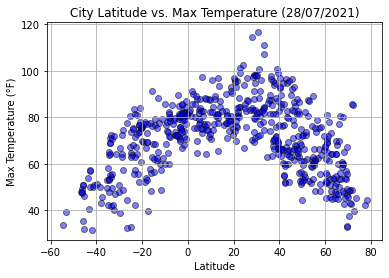

In [43]:
# Build Scatter Plot 
plt.figure(figsize = (6, 4))
plt.scatter(clean_city["Latitude"], clean_city["Max Temperature"], facecolors="blue", marker="o", edgecolor="black", alpha=0.5)

plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (28/07/2021)")
plt.grid(True)

# Save Figure
plt.savefig("Latitude_vs_Max_Temperature.png")
plt.show()


In [44]:
clean_city[["Latitude","Max Temperature"]]

,Latitude,Max Temperature
0,-33.9180,71.10
1,-34.4187,63.90
2,-45.5752,31.95
3,-37.6167,45.90
4,-20.5167,75.58
...,...,...
575,59.7775,67.55
576,8.5332,76.96
577,69.3143,49.06
578,4.8845,79.38


This plot is showing the relationship between temperatre and latitude. The plot indicates that the temperature is greater at and around the equator, which is latitude 0 on the plot.

## Latitude vs. Humidity Plot

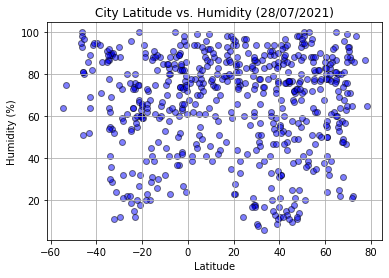

In [45]:
# Build Scatter Plot 
plt.figure(figsize = (6, 4))
plt.scatter(clean_city["Latitude"], clean_city["Humidity"], facecolors="blue", marker="o", edgecolor="black", alpha=0.5)

plt.title("City Latitude vs. Humidity (28/07/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

This scatter plot shows that there isn't much correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

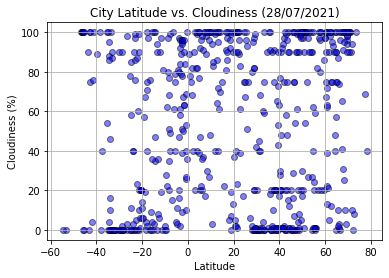

In [46]:
# Build Scatter Plot 
plt.figure(figsize = (6, 4))
plt.scatter(clean_city["Latitude"], clean_city["Cloudiness"], facecolors="blue", marker="o", edgecolor="black", alpha=0.5)

plt.title("City Latitude vs. Cloudiness (28/07/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

This scatter plot shows the relationship between Latitude and Cloudiness, and concludes that there isn't much correlation between the two.

## Latitude vs. Wind Speed Plot

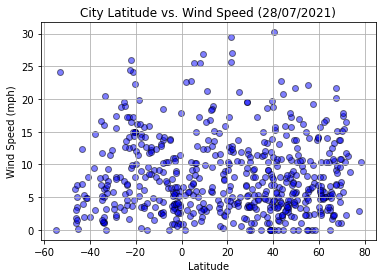

In [47]:
# Build Scatter Plot 
plt.figure(figsize = (6, 4))
plt.scatter(clean_city["Latitude"], clean_city["Wind Speed"], facecolors="blue", marker="o", edgecolor="black", alpha=0.5)

plt.title("City Latitude vs. Wind Speed (28/07/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Latitude_vs_Wind_Speed.png")
plt.show()

This plot looks at the relationship between Latitude and Wind Speed. From this we can see that wind speed is greater, further away from the equator.

## Linear Regression

In [48]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Scatter Plot
    plt.scatter(x_values,y_values, facecolors="blue", marker="o", edgecolor="black", alpha=0.5)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [50]:
# Create Northern and Southern Hemisphere DataFrames
north_df = clean_city.loc[clean_city["Latitude"] >= 0,:]
south_df = clean_city.loc[clean_city["Latitude"] < 0,:]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6144535792320086


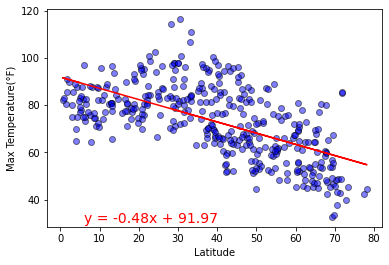

<Figure size 432x288 with 0 Axes>

In [51]:
x_values = north_df["Latitude"]
y_values = north_df["Max Temperature"]
plot_linear_regression(x_values,y_values,'Max Temperature(°F)',(6,30))





####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = south_df["Latitude"]
y_values = south_df["Max Temperature"]
plot_linear_regression(x_values,y_values,'Max Temperature(°F),(6,30))



Both the Northern and Southern Hemispheres show a....relationship between latitude and temperature. As you get closer to the equator (latitude 0) the higher the temperature gets. There is a strong correlation for both hemishperes, but the Northern Hemisphere seems to have a stonger relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity (%)',(6,30))



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity (%), (6,30))



In both northern and southern hemispheres, there isn't a strong correlation between humidity and latitude. However, there does seem to be a slight positive correlation in the Northern Hemisphere and a slight negative correlation in the Southern Hemisphere; meaning in the Northern Hemisphere as you get further away from the equator (latitude 0) humidity increases, and in the Southern Hemisphere it decreases as you get further away from the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness (%)'',(6,30))



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness (%)',(6,30))



Initially, when looking at the plots no correlation can be seen between cloudiness and latitude. However, when the linear regression is performed, you can see that there is a slight positive correlation in the Northern Hemisphere but a strong negative correlation in the Southern Hemisphere. In the Southern Hemisphere it shows that the further you are from the equator (latitude 0) the less cloudy it is.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed (mph)',(6,30))



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed (mph)',(6,30))



There is a correlation between wind speed and latitude from observing the plots however, the linear regression highlights a lower correlation than expected. The correlation in both southern and northern hemispheres, is of higher wind speeds further away from the equator at latitude 0.